In [ ]:
# Ana's probes. 
# Using group across samples v2 (build loci from all peptides in all samples)
# Ideas from meeting Mar 19
# build pca X vector where features are counts for each IPA

In [1]:
from analysis import functional_analysis, parse_IPR_tree, build_loci_from_all_peptidesl_peptides
from itertools import chain
from file_processing import blazmass_tools
HOST = 'localhost'
from pymongo import MongoClient
sclient = MongoClient(HOST, 27018)
protDB = sclient.ProtDB_072114.ProtDB_072114
from collections import defaultdict
import numpy as np
import pandas as pd
%pylab inline

load obo file /home/gstupp/go/go.obo
44424

Populating the interactive namespace from numpy and matplotlib


 nodes imported


In [531]:
import imp
imp.reload(functional_analysis)

load obo file /home/gstupp/go/go.obo
44424 nodes imported


<module 'analysis.functional_analysis' from '/home/gstupp/metaproteomics/analysis/functional_analysis.py'>

In [2]:
root_path = '/mongoc/gstupp/DTASelect/01_2015_mass_spec/H1_11082014/'
tail_path = '/indexDB_search_10ppm_50ppmfrag/dtaselect_results_sfp0.01_p2/DTASelect-filter.txt'
gly1_path = root_path + '1108_Gly1_2014_12_15_15_29205' + tail_path
gly2_path = root_path + 'Gly2_2015_01_20_09_29734' + tail_path
gly3_path = root_path + '1108_Gly3_2015_01_20_09_29738' + tail_path
lys1_path = root_path + '1108_Lys1_2015_01_22_12_29782' + tail_path
lys2_path = root_path + '1108_Lys2_2015_01_28_16_29881' + tail_path
lys3_path = root_path + '1108_Lys3_2015_01_28_16_29882' + tail_path
phe1_path = root_path + 'Phe1_2014_12_10_08_29136' + tail_path
phe2_path = root_path + '1108_Phe2_2014_12_12_10_29176' + tail_path
phe3_path = root_path + '1108_Phe3_2015_01_20_09_29737' + tail_path

In [287]:
## All 9 samples
samples = ['gly1','gly2','gly3','lys1','lys2','lys3','phe1','phe2','phe3']
sample_paths = [gly1_path,gly2_path,gly3_path,
                lys1_path,lys2_path,lys3_path,
                phe1_path,phe2_path,phe3_path]
paths = {sample: sample_path for (sample, sample_path) in zip(samples, sample_paths)}

In [3]:
## Gly and Phe
samples = ['gly1','gly2','gly3','phe1','phe2','phe3']
sample_paths = [gly1_path,gly2_path,gly3_path,
                phe1_path,phe2_path,phe3_path]
paths = {sample: sample_path for (sample, sample_path) in zip(samples, sample_paths)}

In [4]:
def build_pep_quant_dict(path_to_dtaselect_filter, field = 'TotalIntensity', transform = log):
    parser_indexDB = blazmass_tools.dta_select_parser(path_to_dtaselect_filter)
    pep = dict()
    for x in chain(*[locus['peptides'] for locus in parser_indexDB]):
        if transform:
            pep[x['AA_Sequence']] = transform(x[field])
        else:
            pep[x['AA_Sequence']] = x[field]
        if not np.isfinite(pep[x['AA_Sequence']]):
            pep[x['AA_Sequence']] = 0
    return pep

In [50]:
# Get all peptides
SPC = dict() # ex: {'gly1': {'AAA': 43, 'ADB': 5}, 'gly2: {'AAA':23', 'TDSSD': 2}}
for (sample, sample_path) in paths.items():
    SPC[sample] = build_pep_quant_dict(sample_path, field = 'TotalIntensity', transform = None)
all_peptides = list(set(chain(*(pep_sample.keys() for pep_sample in SPC.values()))))
print(len(all_peptides))
print(SPC['gly1']['AAADQPLVIAAVEGIK'])

1991
11683828.5


In [51]:
pd.DataFrame(SPC).T.fillna(0)

AAADQPLVIAAVEGIK  AAAINTIAHSTGAAK  AAAPAAAAPVFAAGDR  AADAVVEELK  \
gly1        11683828.5              0.0               0.0         0.0   
gly2               0.0        1688842.0        23981833.9         0.0   
gly3         6724234.2              0.0        12770964.8         0.0   
phe1        20454418.0              0.0               0.0         0.0   
phe2        26008670.1           1086.9        88133351.0    253123.3   
phe3        11096521.6         202707.7               0.0         0.0   

      AADAVVEELKK  AAEAEIPVFTVDR  AAEHVVGVAK  AAEILDLTEYLDR  AAFNEVYKR  \
gly1          0.0      2917489.6         0.0       236462.8        0.0   
gly2          0.0        52049.6     40956.4        27199.0        0.0   
gly3          0.0            0.0         0.0            0.0        0.0   
phe1          0.0            0.0         0.0       368600.3   471966.4   
phe2     584018.6       241048.9         0.0            0.0        0.0   
phe3          0.0       496815.5         0.0      2624787.1        0.0   

      AAGLFLEQTLK  AAGSDLEYEVGTMIEIPR  AAGVSQVAFDR  AAGYSSIEYITSSLPEAQLK  \
gly1   12881442.3            111448.2   10435710.5                   0.0   
gly2          0.0                 0.0          0.0                   0.0   
gly3   32735484.1                 0.0    2111795.7                   0.0   
phe1   25513574.0            130354.8    7021199.7             1685213.1   
phe2          0.0                 0.0   24796267.5                   0.0   
phe3    4354736.8                 0.0          0.0                   0.0   

      AAIETGVATLPYPK  AAIIGAATDEVK  AALESTLAAITESLK  AALGIVPQPLNAEQTAGLVELLK  \
gly1      26089056.0     6101282.3              0.0                      0.0   
gly2        526600.9           0.0              0.0                 414378.9   
gly3      50179079.0           0.0              0.0                 224663.6   
phe1      23241679.8     1207542.0              0.0                      0.0   
phe2      48211107.3      543929.6        1057158.9                   1581.6   
phe3      28208216.0           0.0          26857.9                      0.0   

      AALIDCLAPDR  AALIFGAVPPGDLNQLLEYTAK  AALQLAQGGHK      
gly1          0.0                     0.0    9932129.4 ...  
gly2          0.0                 99117.2          0.0 ...  
gly3      85545.6                     0.0   16250549.2 ...  
phe1   14445424.7                     0.0   11031710.0 ...  
phe2   30545730.8                     0.0          0.0 ...  
phe3   38713535.0                     0.0   10475022.7 ...  

[6 rows x 1991 columns]

In [359]:
'''
# Divide row by row total (AUC_N) (Normalize by total in each sample)
for sample in SPC.keys():
    sample_total = sum(list(SPC[sample].values()))
    print(str(sample_total))
    for pep in SPC[sample].keys():
        SPC[sample][pep] = SPC[sample][pep]/sample_total * 10000
'''

11108207685.2
14404563167.6
10829233748.5
5373794641.7
6643266358.9
22166502529.7


In [344]:
print(list(SPC['gly1'].items())[:10])

[('VVGQLGQVLGPR', 0.0086833419043175764), ('QYPQTTTVVEGHTDSVGPDAYNQK', 0.011439639856066424), ('AVEVSPPFLGGK', 0.0093143611951281135), ('LEPSATAGFAGPEFIVNSNQGR', 0.0059527168770301198), ('LNPAGSPSVEPK', 0.00018656016177320426), ('QAPDFDVPAVLGNGEIVDSFK', 0.0001942771990023227), ('RLEGNNAELGAK', 2.9583810585340464e-07), ('STPVELEFSQVEK', 0.00036540621357887998), ('QTTDAGFGQSTCVGIGGDPIPGSNFIDILK', 6.2897340275284672e-06), ('AGAANIVPNSTGAAK', 0.00013863835012407595)]


In [125]:
ps = build_loci_from_all_peptides.build_loci_from_all_peptides(all_peptides, mongo_host='localhost')

In [126]:
data = dict()
for p in ps:
    for sample in samples:
        p[sample] = {pep_seq:SPC[sample][pep_seq] for pep_seq in p['peptide_seq'] if pep_seq in SPC[sample]}
    p['sample_SpI'] = {sample: sum(list(p[sample].values())) for sample in samples}
    data[p['id']] = [p['sample_SpI'][sample] for sample in samples]

In [54]:
id = ps[3]['id']
id

'1213,1008,1089,502,76,1483,1514,1755,1639,179,1312,121,841,843,202,472,989,93'

(array([ 175.,  123.,  112.,   84.,   80.,  204.]),
 array([ 1.        ,  1.83333333,  2.66666667,  3.5       ,  4.33333333,
         5.16666667,  6.        ]),
 <a list of 6 Patch objects>)

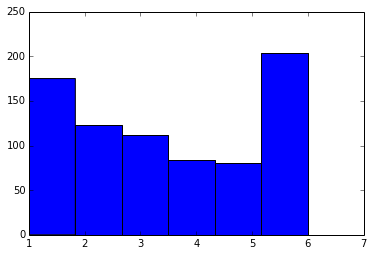

In [55]:
# Number of loci that have at least a single peptide vs number of samples
sample_counts = [len([x for x in p['sample_SpI'].values() if x>0]) for p in ps]
hist(sample_counts,6)

In [270]:
group1 = np.array([0,1,2])
group2 = np.array([3,4,5])
# Loci that are in at least one in each group
data2 = {k:v for k,v in data.items() if sum([x > 0 for x in np.array(v)[group1]])==3 and 
        sum([x > 0 for x in np.array(v)[group2]])<=3}
print(len(data))
print(len(data2))
#list([x.split(',') for x in data2.keys()])

833
284


In [56]:
#functional annotations
for idx,p in enumerate(ps):
    p['ipa'] = functional_analysis.get_annotations(p, return_ipa = True)
    if idx%250 == 0:
        print(idx)

0
250
500
750


In [57]:
print(str(sum(True for x in ps if x['ipa'])) + ' / ' + str(len(ps)))

710 / 778


In [127]:
#df = pd.DataFrame(data, index = ['gly1','gly2','gly3','lys1','lys2','lys3','phe1','phe2','phe3'])
df = pd.DataFrame(data, index = ['gly1','gly2','gly3','phe1','phe2','phe3'])
#df_norm = (df - df.mean()) / df.std()
df = (df.T*10000/df.T.sum()).T #normalize samples to 10000
df = df.replace(0,np.NaN)
# Keep features that are in at least 2 reps in either group
df = df.T[np.array([df.T[['gly1','gly2','gly3']].T.count()>=2,df.T[['phe1','phe2','phe3']].T.count()>=2]).any(axis = 0)].T
df = df.replace(np.NaN,0)
#df = df[df.columns[df.count() == 6]].apply(log)


In [133]:
df

0,1346     0,492  1002,78,1070,274  1006,1417,1427,456,880  \
gly1  1.471598  2.109311         14.078899              913.255710   
gly2  5.045643  9.430462          0.000000              345.769976   
gly3  2.462524  2.500539          0.000000              715.366936   
phe1  0.000000  0.000000         12.215911              610.680599   
phe2  0.000000  0.000000          7.758480              914.109584   
phe3  0.000000  0.000000         12.347498              992.978793   

      1006,1418,1427,38,880  1007,1922,801,637  1009,659,1731  \
gly1             903.386874           8.368622      23.508444   
gly2             321.842000           2.654633       1.084338   
gly3             714.181508          10.578160       0.000000   
phe1             610.706984          12.101951       0.000000   
phe2             902.919729           0.267060       0.000000   
phe3             991.360898           9.772782       0.000000   

      1014,554,625,1520,1266,879,284,1279,1732  1016,1984,1662,1329  \
gly1                                  1.684734            66.605322   
gly2                                 25.551716           265.383434   
gly3                                  0.432176           152.257662   
phe1                                  0.713030            77.120855   
phe2                                  1.060757             4.533484   
phe3                                  0.698818            49.732534   

      1016,1984,22  1017,821,1801,1810,828  1018,1683,1585  \
gly1      2.001410                0.580783        0.000000   
gly2      0.000000                0.000000       30.643303   
gly3      1.351283                1.735443       11.040998   
phe1      9.300188                0.254357        0.000000   
phe2      4.605881                1.901351       29.410176   
phe3      0.138214                0.355993        0.000000   

      102,1817,291,739,282,1870,1626,1259,1758    102,574    102,765  \
gly1                                 32.896965   8.380689   8.448121   
gly2                                202.143987  35.132774  35.132774   
gly3                                 86.185505   0.515130   0.515130   
phe1                                 58.922745  15.736083  15.736083   
phe2                                 85.764099   4.243463   3.522391   
phe3                                 82.418977  56.882066  56.882066   

      1021,590,975,1941,894,1254,1493  \
gly1                        11.364608   
gly2                         0.123754   
gly3                         6.111544   
phe1                        24.784020   
phe2                         2.098495   
phe3                        37.267697   

      1024,1686,1268,1001,1249,1877,1718,1364  1024,1864,1686,1718  \
gly1                                 0.394838             0.000000   
gly2                                 0.000000             0.000000   
gly3                                 0.330863             0.271416   
phe1                                 1.205175             0.170037   
phe2                                 1.158864             0.804680   
phe3                                 1.563018             0.346027   

      1028,1487,1746  1030,1433,720,48      
gly1       47.628344         22.582383 ...  
gly2       40.023852          9.392222 ...  
gly3       80.934957          4.424867 ...  
phe1       21.758918         31.278099 ...  
phe2        0.085593         32.048973 ...  
phe3       17.195066         28.452325 ...  

[6 rows x 552 columns]

In [132]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(df)
Y_sklearn
sklearn_pca.explained_variance_ratio_

array([ 0.60639842,  0.17423287,  0.11713113])

In [129]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

In [130]:
traces = []
#y = np.array(['gly','gly','gly','lys','lys','lys','phe','phe','phe'])
y = np.array(['gly','gly','gly','phe','phe','phe'])
#for group in ['gly','lys','phe']:
for group in ['gly','phe']:
    trace = Scatter(
        x=Y_sklearn[y==group,0],
        y=Y_sklearn[y==group,1],
        mode='markers',
        name=group,
        text = ['1','2','3'],
        marker=Marker(
            size=12,
            line=Line(color='rgba(217, 217, 217, 0.14)',width=0.5),
            opacity=0.8))
    traces.append(trace)


plotly_data = Data(traces)
layout = Layout(xaxis=XAxis(title='PC1', showline=False),
                yaxis=YAxis(title='PC2', showline=False))
fig = Figure(data=plotly_data, layout=layout)
py.iplot(fig)

[1 2 3 1 1 1]


{'color_list': ['g', 'g', 'b', 'b', 'b'],
 'dcoord': [[0.0, 918.98372021602677, 918.98372021602677, 0.0],
  [0.0, 1104.8843018403672, 1104.8843018403672, 918.98372021602677],
  [0.0, 1395.6628591554331, 1395.6628591554331, 1104.8843018403672],
  [0.0, 1683.8501607364747, 1683.8501607364747, 0.0],
  [1395.6628591554331,
   1984.8360827921802,
   1984.8360827921802,
   1683.8501607364747]],
 'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [13.75, 13.75, 50.0, 50.0]],
 'ivl': ['phe3', 'phe1', 'gly1', 'phe2', 'gly2', 'gly3'],
 'leaves': [5, 3, 0, 4, 1, 2]}

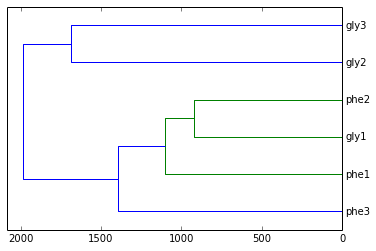

In [423]:
%matplotlib inline
import scipy.cluster.hierarchy as hac
z = hac.linkage(df, method = 'average', metric = "euclidean")
print(hac.fcluster(z, 3, 'maxclust'))
hac.dendrogram(z,orientation='right', labels = samples)

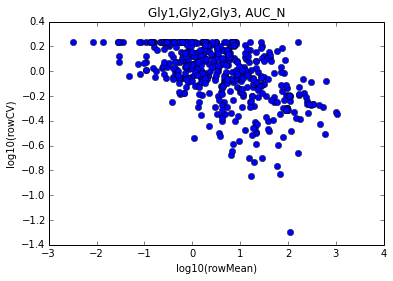

In [461]:
df_gly = df.T[['gly1','gly2','gly3']].T
plot(df_gly.mean().apply(log10),(df_gly.std()/df_gly.mean()).apply(log10),'o')
xlabel('log10(rowMean)')
ylabel('log10(rowCV)')
title('Gly1,Gly2,Gly3, AUC_N')

In [59]:
df

0,1346      0,492  1002,78,1070,274  1006,1417,1427,456,880  \
gly1  2426900.6  3478591.3        23218360.3            1.506105e+09   
gly2  3989090.6  7455732.5               0.0            2.733661e+08   
gly3  2857955.7  2902075.1               0.0            8.302405e+08   
phe1        0.0        0.0        25143457.0            1.256936e+09   
phe2        0.0        0.0        23326832.2            2.748384e+09   
phe3        0.0        0.0        20050412.6            1.612443e+09   

      1006,1418,1427,38,880  1007,1922,801,637  1009,659,1731  \
gly1           1.489830e+09         13801199.2     38769192.2   
gly2           2.544486e+08          2098755.6       857278.6   
gly3           8.288647e+08         12276798.8            0.0   
phe1           1.256991e+09         24908897.2            0.0   
phe2           2.714740e+09           802950.3            0.0   
phe3           1.609816e+09         15869475.7            0.0   

      1014,554,625,1520,1266,879,284,1279,1732  1016,1984,1662,1329  \
gly1                                 2778396.0          109842851.4   
gly2                                20201213.0          209812413.7   
gly3                                  501574.9          176707174.8   
phe1                                 1467597.7          158734362.6   
phe2                                 3189298.3           13630481.1   
phe3                                 1134772.2           80757885.0   

      1016,1984,22  1017,821,1801,1810,828  1018,1683,1585  \
gly1     3300645.3                957803.9             0.0   
gly2           0.0                     0.0      24226626.9   
gly3     1568271.8               2014120.5      12813959.7   
phe1    19142156.2                523531.9             0.0   
phe2    13848153.2               5716646.2      88425342.2   
phe3      224437.4                578077.7             0.0   

      102,1817,291,739,282,1870,1626,1259,1758     102,574     102,765  \
gly1                                54252368.3  13821099.7  13932306.1   
gly2                               159815242.5  27776007.1  27776007.1   
gly3                               100025160.2    597849.4    597849.4   
phe1                               121278017.6  32388866.1  32388866.1   
phe2                               257860399.1  12758497.7  10590505.7   
phe3                               133835575.7  92367610.7  92367610.7   

      1021,590,975,1941,894,1254,1493  \
gly1                       18742059.5   
gly2                          97839.7   
gly3                        7092935.1   
phe1                       51011825.7   
phe2                        6309385.5   
phe3                       60516932.2   

      1024,1686,1268,1001,1249,1877,1718,1364  1024,1864,1686,1718  \
gly1                                 651150.7                  0.0   
gly2                                      0.0                  0.0   
gly3                                 383992.9             315000.4   
phe1                                2480556.7             349979.3   
phe2                                3484269.7            2419369.0   
phe3                                2538097.7             561893.9   

      1028,1487,1746  1030,1433,720,48      
gly1      78546771.8        37241969.2 ...  
gly2      31642898.3         7425500.4 ...  
gly3      93931480.8         5135411.5 ...  
phe1      44785395.3        64378294.2 ...  
phe2        257347.2        96359211.0 ...  
phe3      27922108.1        46202142.4 ...  

[6 rows x 552 columns]

In [60]:
# Run plgem in R
df.to_csv('/home/gstupp/metaproteomics/analysis/ana/data_ana_probe_mar_2015.csv')

In [89]:
pValues = pd.read_csv("/home/gstupp/metaproteomics/analysis/ana/LPSpValues.csv", index_col=0)
pValues = pValues.to_dict()['gly_vs_lys']
pValues = {k[1:].replace('.',','):v for (k,v) in pValues.items()}
pValues

KeyError: 'gly_vs_lys'

In [114]:
data = pd.read_csv("/home/gstupp/metaproteomics/analysis/ana/m2_sort.csv", index_col=0)
data.index = [v[1:].replace('.',',') for v in data.index]
sig = data.iloc[:23]
data = data.T

In [115]:
data['0,1346']
#data['gly_vs_phe']['0,1346']

gly1          2426900.600000
gly2          3989090.600000
gly3          2857955.700000
phe1                0.000000
phe2                0.000000
phe3                0.000000
STN                 1.012222
gly_vs_phe          0.014989
Name: 0,1346, dtype: float64

In [92]:
next(iter(sig.index))

'522,334'

In [499]:
#information about sig loci
for id in sig.index:
    locus = [p for p in ps if p['id'] == id][0]
    protids = locus['protID']
    
    #print(len(protids))
    print(list([x['d'] for x in protDB.find({'_id': {'$in': protids}})])[:1])
    #print(locus['ipa'])
    #print([parse_IPR_tree.IPR_terms[x].name for x in locus['ipa'] if x in parse_IPR_tree.IPR_terms] if locus['ipa'] else None)
    #print(sorted(list(locus['peptide_seq'])))
    #print('--------')

['gi|518225832|ref|WP_019396040.1| quinoprotein ethanol dehydrogenase, partial [Pseudomonas aeruginosa]']
['tr|E9PEW8|E9PEW8_HUMAN Hemoglobin subunit delta (Fragment) OS=Homo sapiens GN=HBD PE=1 SV=1']
['gi|553750709|ref|WP_023083598.1| hypothetical protein [Pseudomonas aeruginosa]']
['gi|497561845|ref|WP_009876029.1| porin [Pseudomonas aeruginosa]']
['gi|548174676|ref|WP_022396231.1| glyceraldehyde-3-phosphate dehydrogenase type I [Akkermansia sp. CAG:344]']
['SRS012273.94850-T1-C']
['sp|O60844|ZG16_HUMAN Zymogen granule membrane protein 16 OS=Homo sapiens GN=ZG16 PE=1 SV=2']
['gi|515906118|ref|WP_017336701.1| endo-1,4-D-glucanase [Pseudomonas fluorescens]']
['gi|479154399|ref|YP_007784174.1| translation elongation factor 1A (EF-1A/EF-Tu) [Ruminococcus sp. SR1/5]']
['gi|515324620|ref|WP_016852939.1| aldehyde dehydrogenase, partial [Pseudomonas aeruginosa]']
['gi|557225263|ref|YP_008765478.1| 30S ribosomal protein S8 [Pseudomonas sp. VLB120]']
['tr|G3V544|G3V544_HUMAN Short peptide fro

In [111]:
for id in ipa_sets['IPR024034']:
    locus = [p for p in ps if p['id'] == id][0]
    protids = locus['protID']
    print(locus['ipa'])
    print(list([x['d'] for x in protDB.find({'_id': {'$in': protids}})])[:1])

{'IPR027417', 'IPR000793', 'IPR004100', 'IPR024034', 'IPR020003', 'IPR003593', 'IPR005722', 'IPR000194'}
['gi|514236174|ref|WP_016538823.1| ATP synthase F1, beta subunit [Cedecea davisae]']
{'IPR027417', 'IPR000793', 'IPR004100', 'IPR024034', 'IPR020003', 'IPR003593', 'IPR005722', 'IPR000194'}
['gi|506261866|ref|WP_015781641.1| F0F1 ATP synthase subunit beta [Kangiella koreensis]']
{'IPR027417', 'IPR000793', 'IPR004100', 'IPR024034', 'IPR020003', 'IPR003593', 'IPR005722', 'IPR000194'}
['521000.PROVRETT_10006 [Complete]:-  codon-table.11']
{'IPR027417', 'IPR000793', 'IPR004100', 'IPR024034', 'IPR020003', 'IPR003593', 'IPR005722', 'IPR000194'}
['gi|557225820|ref|YP_008766035.1| F0F1 ATP synthase subunit beta [Pseudomonas sp. VLB120]']
{'IPR027417', 'IPR000793', 'IPR004100', 'IPR024034', 'IPR020003', 'IPR003593', 'IPR005722', 'IPR000194'}
['gi|470166009|ref|YP_007547096.1| ATP synthase subunit beta [Bibersteinia trehalosi USDA-ARS-USMARC-192]']
{'IPR027417', 'IPR000793', 'IPR004100', 'IPR

In [65]:
ps_filtered = [p for p in ps if p['id'] in df]
print(str(len(ps_filtered)) + ' / ' + str(len(ps)))

552 / 778


In [66]:
# Make locus>ipa dict
locus_ipa = dict()
for p in ps_filtered:
    if p['ipa']:
        locus_ipa[p['id']] = p['ipa']
#locus_ipa

In [78]:
ipa_sets = parse_IPR_tree.generate_ipa_sets(locus_ipa)
for k,v in ipa_sets.items():
    ipa_sets[k] = list(v)

In [79]:
len(ipa_sets)

49

In [109]:
# an Example IPA set
ipa = next(iter(ipa_sets.keys()))
ipa = 'IPR024034'
print(ipa)
print(ipa_sets[ipa])
#print(df[ipa_sets[ipa]].T)

IPR024034
['1487,193,31', '1628,1487,1063,644,1820', '1628,1487,644,1746,1887,1820', '312,565,644,7,1563,193,1487,287,1746,1887,1820', '1628,1487,1746,312,1820', '1487,1063,1746,193', '1487,644,5,312,1820', '1487,748', '1628,565,1487,644,1746,1820', '1628,312,1487,644,1887,1820', '312,565,19,644,193,1487,1746,1887,1820', '624,312,1035,565,644,7,1563,193,1487,287,1746,362,1820', '1628,1487,644,1563,1820', '1628,1487,1688,1820,31', '1487,644,1936,565,1820', '1487,1746,644,312,5', '1028,1487,1746', '1487,1746,644,1055', '1487,170']


[0.072224637681159401, 0.93273188405797092, 0.99524275362318804, 0.92142753623188411, 0.22009420289855103, 0.26603985507246397, 0.99540942028985502, 0.91724637681159404, 0.27386594202898601, 0.0950036231884058, 0.980692028985507, 0.87481521739130408, 0.947771739130435, 0.24556884057971001, 0.91501086956521704, 0.028438405797101399, 0.92818478260869597, 0.99513405797101495, 0.0044891304347826101, 0.059199275362318803, 0.0569239130434782, 0.98379710144927501, 0.046438405797101498, 0.0096956521739129907, 0.95689130434782599, 0.15202536231884101, 0.038503623188405799, 0.300039855072464, 0.93576811594202902, 0.093264492753623099, 0.046130434782608698, 0.073826086956521694, 0.94455072463768097, 0.934170289855072, 0.98415942028985504, 0.82543115942028999, 0.067231884057970995, 0.80788043478260907, 0.99010144927536203, 0.95026449275362301, 0.9556086956521741, 0.13157608695652198, 0.94895289855072495, 0.73056159420289901, 0.98222463768115909, 0.95049637681159405, 0.80664855072463792, 0.08839492

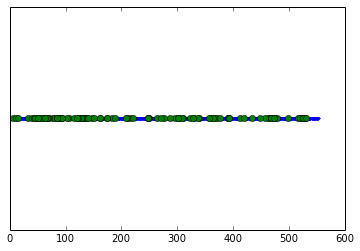

In [120]:
pValues = data.T['gly_vs_phe']
from scipy.stats import mannwhitneyu
ipa = 'IPR027417'
ipa_items = ipa_sets[ipa]
ps_this = [pValues[x] for x in ipa_items]
print(ps_this)
ps_others = [pValues[x] for x in data.keys() if x not in ipa_items]
#print(ps_others)
print(mannwhitneyu(ps_this, ps_others))
# Visualize ranks
from scipy.stats import rankdata
ranks = rankdata(ps_this + ps_others)
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
xs1 = ranks[:len(ps_this)]
xs2 = ranks[len(ps_this):]
ax1.plot(xs2,np.ones(len(xs2)),'.')
ax1.plot(xs1,np.ones(len(xs1)),'o')
ax1.yaxis.set_visible(False)

In [107]:
rank_p

{'IPR000194': (2108.0, 1.5821826300998788e-08),
 'IPR000793': (2042.0, 3.3945771282400541e-08),
 'IPR000795': (11994.5, 0.30291282157434407),
 'IPR001844': (6160.0, 0.19671584228405931),
 'IPR002423': (6360.0, 0.18419322399778831),
 'IPR003439': (2106.5, 0.0024319299833527844),
 'IPR003593': (8818.0, 0.071703363384207297),
 'IPR004100': (2042.0, 3.3945771282400541e-08),
 'IPR004160': (9936.5, 0.47239282918441616),
 'IPR004161': (12634.5, 0.36939623746751538),
 'IPR004541': (9588.5, 0.3329870517815513),
 'IPR005225': (11443.5, 0.4257062832222534),
 'IPR005722': (1457.0, 6.5109727911498753e-08),
 'IPR006095': (2614.0, 0.0038836447879231168),
 'IPR006096': (2763.0, 0.0076540117415737231),
 'IPR006097': (2614.0, 0.0038836447879231168),
 'IPR006424': (2782.0, 0.047523999082887979),
 'IPR007120': (2700.0, 0.16175723632368633),
 'IPR007121': (2700.0, 0.16175723632368633),
 'IPR007641': (2700.0, 0.16175723632368633),
 'IPR007642': (2700.0, 0.16175723632368633),
 'IPR007644': (2700.0, 0.1617572

In [119]:
ipas = {'IPR027417', 'IPR000793', 'IPR004100', 'IPR024034', 'IPR020003', 'IPR003593', 'IPR005722', 'IPR000194'}
print([parse_IPR_tree.IPR_terms[x].name for x in ipas if x in parse_IPR_tree.IPR_terms])

['P-loop containing nucleoside triphosphate hydrolase', 'ATPase, F1/V1/A1 complex, alpha/beta subunit, C-terminal', 'ATPase, F1 complex alpha/beta subunit, N-terminal domain', 'ATPase, F1 complex beta subunit/V1 complex, C-terminal', 'ATPase, alpha/beta subunit, nucleotide-binding domain, active site', 'AAA+ ATPase domain', 'ATPase, F1 complex, beta subunit', 'ATPase, F1/V1/A1 complex, alpha/beta subunit, nucleotide-binding domain']


In [117]:
rank_p = dict()
for ipa,ipa_items in ipa_sets.items():
    ps_this = [pValues[x] for x in ipa_items]
    ps_others = [pValues[x] for x in data.keys() if x not in ipa_items]
    rank_p[ipa] = mannwhitneyu(ps_this, ps_others)
    
    
rank_p_sorted = sorted([(k,v) for k,v in rank_p.items()], key = lambda x:x[1])
print(rank_p_sorted[:7]) #+ rank_p_sorted[-5:])
print([parse_IPR_tree.IPR_terms[x[0]].name for x in rank_p_sorted[:7] if x[0] in parse_IPR_tree.IPR_terms])

[('IPR008995', (650.0, 1.8871066401305132e-05)), ('IPR024034', (1457.0, 6.5109727911498753e-08)), ('IPR005722', (1457.0, 6.5109727911498753e-08)), ('IPR012336', (1573.0, 0.011481800184173708)), ('IPR015813', (1924.0, 0.058007914697015883)), ('IPR020003', (2042.0, 3.3945771282400541e-08)), ('IPR004100', (2042.0, 3.3945771282400541e-08))]
['Molybdate/tungstate binding, C-terminal', 'ATPase, F1 complex beta subunit/V1 complex, C-terminal', 'ATPase, F1 complex, beta subunit', 'Thioredoxin-like fold', 'Pyruvate/Phosphoenolpyruvate kinase-like domain', 'ATPase, alpha/beta subunit, nucleotide-binding domain, active site', 'ATPase, F1 complex alpha/beta subunit, N-terminal domain']


In [87]:
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import FloatVector
stats = importr('stats')
p_adjust = list(stats.p_adjust(FloatVector([x[1] for x in rank_p_sorted]), method = 'BH'))
print(list(zip(rank_p_sorted,p_adjust))[:10])
print(list(p_adjust)[:20])

[(('IPR000194', 1.5821799592689186e-08), 4.1583502923883213e-07), (('IPR020003', 3.3945716672557726e-08), 4.1583502923883213e-07), (('IPR004100', 3.3945716672557726e-08), 4.1583502923883213e-07), (('IPR000793', 3.3945716672557726e-08), 4.1583502923883213e-07), (('IPR024034', 6.5109627568440266e-08), 5.317286251422621e-07), (('IPR005722', 6.5109627568440266e-08), 5.317286251422621e-07), (('IPR008995', 1.8953173764038751e-05), 0.00013267221634827127), (('IPR003439', 0.0024383606071402318), 0.013275518861096819), (('IPR017871', 0.0024383606071402318), 0.013275518861096819), (('IPR016040', 0.0034772286208832976), 0.015858209506461392)]
[4.1583502923883213e-07, 4.1583502923883213e-07, 4.1583502923883213e-07, 4.1583502923883213e-07, 5.317286251422621e-07, 5.317286251422621e-07, 0.00013267221634827127, 0.013275518861096819, 0.013275518861096819, 0.015858209506461392, 0.015858209506461392, 0.015858209506461392, 0.026789031520307642, 0.026789031520307642, 0.037507201986398564, 0.056734202793487

In [77]:
x.T.sum()

0    17624.563339
1    21311.448636
2    31639.774859
3    22439.766675
4    18316.209170
5    24035.388128
dtype: float64

In [ ]:
# SpI stuff down here. Not using. Remove after git commit


In [85]:
# Calculate SpI for each locus
SpIs = dict()
for k,v in data.items():
    sc1 = np.array(data[k])[group1]
    sc2 = np.array(data[k])[group2]
    SpIs[k] = group_across_samples_tools.SpI(sc1,sc2)

In [123]:
# MWU SpI
from scipy.stats import mannwhitneyu
SpIs_this = [SpIs[x] for x in ipa_items]
print(SpIs_this)
SpIs_others = [SpIs[x] for x in data.keys() if x not in ipa_items]
#print(SpIs_others)
mannwhitneyu(SpIs_this, SpIs_others)

[-1.0, -1.0, -1.0, 0.384442156823876, 0.50100279229671774, -1.0, 0.59503492506399203, -0.23788762677625719, 0.42026438184863657, -0.73930211202831808, -0.19678276754716323, 0.45611894278644377, -0.62854340581040669, -0.17095970514958719, 0.46443304981820921, -0.73219276240483067, -0.10834750047181912]


(5914.0, 0.27151456015369441)

In [ ]:
# Visualize ranks SpI
from scipy.stats import rankdata
#ranks = rankdata(SpIs_this + SpIs_others, method = 'ordinal')
ranks = rankdata(SpIs_this + SpIs_others)
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
xs1 = ranks[:len(SpIs_this)]
xs2 = ranks[len(SpIs_this):]
ax1.plot(xs2,np.ones(len(xs2)),'.')
ax1.plot(xs1,np.ones(len(xs1)),'o')
ax1.yaxis.set_visible(False)

In [82]:
rank_p = dict()
for ipa,ipa_items in ipa_sets.items():
    SpIs_this = [SpIs[x] for x in ipa_items]
    SpIs_others = [SpIs[x] for x in data.keys() if x not in ipa_items]
    rank_p[ipa] = mannwhitneyu(SpIs_this, SpIs_others)[1]
    
    
rank_p_sorted = sorted([(k,v) for k,v in rank_p.items()], key = lambda x:x[1])
print(rank_p_sorted[:12])
print([parse_IPR_tree.IPR_terms[x[0]].name for x in rank_p_sorted[:20] if x[0] in parse_IPR_tree.IPR_terms])

[('IPR006097', 7.258757237347054e-07), ('IPR006095', 7.258757237347054e-07), ('IPR006096', 1.8462595116285395e-06), ('IPR014362', 2.1678782678291852e-06), ('IPR016040', 6.7910071943556058e-05), ('IPR008995', 0.0070264883037538771), ('IPR020830', 0.0089528140609237295), ('IPR020831', 0.012515765716895855), ('IPR020829', 0.012515765716895855), ('IPR020828', 0.014224874471898446), ('IPR012336', 0.014311477020539774), ('IPR002423', 0.016828142597849875)]
['Glutamate/phenylalanine/leucine/valine dehydrogenase, dimerisation domain', 'Glutamate/phenylalanine/leucine/valine dehydrogenase', 'Glutamate/phenylalanine/leucine/valine dehydrogenase, C-terminal', 'Glutamate dehydrogenase', 'NAD(P)-binding domain', 'Molybdate/tungstate binding, C-terminal', 'Glyceraldehyde 3-phosphate dehydrogenase, active site', 'Glyceraldehyde/Erythrose phosphate dehydrogenase family', 'Glyceraldehyde 3-phosphate dehydrogenase, catalytic domain', 'Glyceraldehyde 3-phosphate dehydrogenase, NAD(P) binding domain', 'Th

In [198]:
import numpy as np
import pylab as pl
from sklearn.cross_decomposition import PLSCanonical
df = pd.DataFrame(data)
dm = df.as_matrix()
dm

array([[   0.        ,  141.57014157,   44.12575841, ...,    0.        ,
         472.51332966,    0.        ],
       [   0.        ,  109.42348522,   52.26196309, ...,    0.        ,
         579.78115303,    0.        ],
       [   0.        ,    0.        ,    7.50469043, ...,    0.        ,
         197.6235147 ,    0.        ],
       [   6.34034999,   96.37331981,    0.        , ...,    3.80420999,
         299.2645194 ,    2.53613999],
       [  13.80156418,    0.        ,    0.        , ...,    7.66753565,
         414.04692532,    4.60052139],
       [   8.56164384,   35.67351598,    0.        , ...,    5.70776256,
         569.34931507,    2.85388128]])

In [202]:
myplsda = PLSCanonical(copy = True)
myplsda.fit(dm, [1,1,1,2,2,2])

ValueError: array must not contain infs or NaNs

In [201]:
dm

array([[   0.        ,  141.57014157,   44.12575841, ...,    0.        ,
         472.51332966,    0.        ],
       [   0.        ,  109.42348522,   52.26196309, ...,    0.        ,
         579.78115303,    0.        ],
       [   0.        ,    0.        ,    7.50469043, ...,    0.        ,
         197.6235147 ,    0.        ],
       [   6.34034999,   96.37331981,    0.        , ...,    3.80420999,
         299.2645194 ,    2.53613999],
       [  13.80156418,    0.        ,    0.        , ...,    7.66753565,
         414.04692532,    4.60052139],
       [   8.56164384,   35.67351598,    0.        , ...,    5.70776256,
         569.34931507,    2.85388128]])

In [155]:
df

1,959,1166,814,1690  1000,428,859   1006,105  1007,1043   101,634  \
0             0.000000    141.570142  44.125758   0.000000  0.000000   
1             0.000000    109.423485  52.261963   0.000000  0.000000   
2             0.000000      0.000000   7.504690   0.000000  0.000000   
3             6.340350     96.373320   0.000000   0.000000  0.000000   
4            13.801564      0.000000   0.000000   0.000000  7.667536   
5             8.561644     35.673516   0.000000   2.853881  0.000000   

   1010,1461,513,873,202,1054,1254,1664   1012,276  1014,1259  1016,1989  \
0                             75.381504   0.000000   0.000000   5.515720   
1                             75.126572   0.000000   0.000000   0.000000   
2                             46.278924   0.000000   0.000000   0.000000   
3                            109.054020  17.752980   0.000000   5.072280   
4                            145.683177   0.000000   0.000000   3.067014   
5                            128.424658  14.269406   2.853881   0.000000   

   1022,1721  1024,1238  1025,1899,1045  1025,407,704,1899,735  1026,1239,10  \
0   0.000000   3.677147        0.000000               0.000000      7.354293   
1   0.000000   0.000000        0.000000               0.000000      6.532745   
2   3.752345   0.000000        0.000000               0.000000      0.000000   
3  10.144560   0.000000        1.268070              44.382450      2.536140   
4   0.000000   0.000000       16.868578              33.737157      6.134029   
5   0.000000   1.426941        0.000000               0.000000      0.000000   

   1026,1279  1027,380  1030,1703,1228,442  1034,677,1692,484  \
0   0.000000  0.000000           16.547159           0.000000   
1   0.000000  0.000000           14.698677           0.000000   
2   0.000000  0.000000           25.015635           5.003127   
3   0.000000  0.000000           32.969820           1.268070   
4   3.067014  3.067014           47.538721           3.067014   
5   2.853881  0.000000           35.673516           1.426941   

   1037,795,1898,139,775  1046,800,1623      
0              23.901452       0.000000 ...  
1              17.965050       0.000000 ...  
2              23.764853       0.000000 ...  
3              11.412630       3.804210 ...  
4               0.000000       6.134029 ...  
5               0.000000       0.000000 ...  

[6 rows x 778 columns]